# Calculating all distances between two groups of atoms

Here we use ``distances.distance_array`` to quantify the distances between each atom of a target set to each atom in a reference set, and show how we can extend that to calculating the distances between the centers-of-mass of residues.

**Last updated:** January 2020

**Minimum version of MDAnalysis:** 0.20.1

**Packages required:**
    
* MDAnalysis [[1, 2]](#References)
* MDAnalysisTests
   
**Optional packages for visualisation:**

* [matplotlib](https://matplotlib.org)



In [14]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PDB_small
from MDAnalysis.analysis import distances

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. [[3]](#References) AdK has three domains: 

  * CORE
  * LID: an ATP-binding domain (residues 122-159)
  * NMP: an AMP-binding domain (residues 30-59)
  

In [15]:
u = mda.Universe(PDB_small)   # open AdK

## Calculating atom-to-atom distances between non-matching coordinate arrays

We select the alpha-carbon atoms of each domain.

In [26]:
LID_ca = u.select_atoms('name CA and resid 122-159')
NMP_ca = u.select_atoms('name CA and resid 30-59')

n_LID = len(LID_ca)
n_NMP = len(NMP_ca)
print('LID has {} residues and NMP has {} residues'.format(n_LID, n_NMP))

LID has 38 residues and NMP has 30 residues


`distances.distance_array` will produce an array with shape `(n, m)` distances if there are `n` positions in the reference array and `m` positions in the other configuration. If you want to calculate distances following the minimum image convention, you *must* pass the universe dimensions into the ``box`` keyword.

In [27]:
dist_arr = distances.distance_array(LID_ca.positions, # reference
                                    NMP_ca.positions, # configuration
                                    box=u1.dimensions)
dist_arr.shape

(38, 30)

### Plotting distance as a heatmap

Text(0, 0.5, 'Distance (Angstrom)')

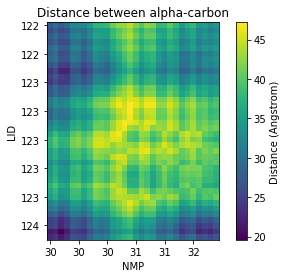

In [28]:
fig, ax = plt.subplots()
im = ax.imshow(dist_arr, origin='upper')

# add residue ID labels to axes
tick_interval = 5
ax.set_yticks(np.arange(n_LID)[::tick_interval])
ax.set_xticks(np.arange(n_NMP)[::tick_interval])
ax.set_yticklabels(LID.resids[::tick_interval])
ax.set_xticklabels(NMP.resids[::tick_interval])

# add figure labels and titles
plt.ylabel('LID')
plt.xlabel('NMP')
plt.title('Distance between alpha-carbon')

# colorbar
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Distance (Angstrom)')

## Calculating residue-to-residue distances

As `distances.distance_array` just takes coordinate arrays as input, it is very flexible in calculating distances between each atom, or centers-of-masses, centers-of-geometries, and so on.

Instead of calculating the distance between the alpha-carbon of each residue, we could look at the distances between the centers-of-mass instead. The process is very similar to the atom-wise distances above, but we give `distances.distance_array` an array of residue center-of-mass coordinates instead.

In [29]:
LID = u.select_atoms('resid 122-159')
NMP = u.select_atoms('resid 30-59')

LID_com = LID.center_of_mass(compound='residues')
NMP_com = NMP.center_of_mass(compound='residues')

n_LID = len(LID_com)
n_NMP = len(NMP_com)

print('LID has {} residues and NMP has {} residues'.format(n_LID, n_NMP))

LID has 38 residues and NMP has 30 residues


We can pass these center-of-mass arrays directly into `distances.distance_array`.

In [30]:
res_dist = distances.distance_array(LID_com, NMP_com,
                                    box=u.dimensions)

### Plotting

Text(0, 0.5, 'Distance (Angstrom)')

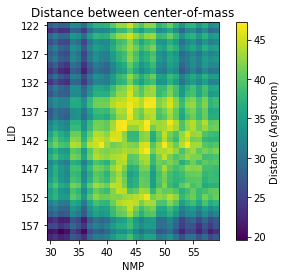

In [31]:
fig2, ax2 = plt.subplots()
im2 = ax2.imshow(res_dist, origin='upper')

# add residue ID labels to axes
tick_interval = 5
ax2.set_yticks(np.arange(n_LID)[::tick_interval])
ax2.set_xticks(np.arange(n_NMP)[::tick_interval])
ax2.set_yticklabels(LID.residues.resids[::tick_interval])
ax2.set_xticklabels(NMP.residues.resids[::tick_interval])

# add figure labels and titles
plt.ylabel('LID')
plt.xlabel('NMP')
plt.title('Distance between center-of-mass')

# colorbar
cbar2 = fig2.colorbar(im)
cbar2.ax.set_ylabel('Distance (Angstrom)')

## References

[1]: R. J. Gowers, M. Linke, J. Barnoud, T. J. E. Reddy, M. N. Melo, S. L. Seyler, D. L. Dotson, J. Domanski, S. Buchoux, I. M. Kenney, and O. Beckstein. [MDAnalysis: A Python package for the rapid analysis of molecular dynamics simulations](http://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html). In S. Benthall and S. Rostrup, editors, *Proceedings of the 15th Python in Science Conference*, pages 98-105, Austin, TX, 2016. SciPy, [doi:10.25080/majora-629e541a-00e](https://doi.org/10.25080/majora-629e541a-00e).

[2]: N. Michaud-Agrawal, E. J. Denning, T. B. Woolf, and O. Beckstein. MDAnalysis: A Toolkit for the Analysis of Molecular Dynamics Simulations. *J. Comput. Chem*. 32 (2011), 2319-2327, doi:[10.1002/jcc.21787](https://dx.doi.org/10.1002/jcc.21787). PMCID:[PMC3144279](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3144279/)

[3]: Beckstein O, Denning EJ, Perilla JR, Woolf TB. Zipping and unzipping of adenylate kinase: atomistic insights into the ensemble of open<-->closed transitions. *J Mol Biol*. 2009;394(1):160–176. [doi:10.1016/j.jmb.2009.09.009](https://dx.doi.org/10.1016%2Fj.jmb.2009.09.009)